# Market Basket Analysis

This project analyzes grocery market basket data using Python, Pandas, and mlxtend.

## Features
- Data cleaning and preprocessing
- Frequent itemsets analysis using Apriori
- Association rules generation
- Visualizations of top items and rules

## How to run
1. Install dependencies:

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
!pip install mlxtend

In [63]:
from mlxtend.frequent_patterns import apriori,association_rules



In [64]:
from warnings import filterwarnings
filterwarnings('ignore')

In [65]:
df= pd.read_csv('/content/Dataset14-Grocery-MarketBasket-Analysis.csv')
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [66]:
df.shape

(38765, 3)

In [67]:
df.dtypes

,0
Member_number,int64
Date,object
itemDescription,object


In [68]:
df.isnull().sum()

,0
Member_number,0
Date,0
itemDescription,0


In [69]:
df.duplicated().any()

np.True_

In [70]:
df[df.duplicated()]

,Member_number,Date,itemDescription
5015,2051,11-09-2015,frankfurter
5022,3055,18-08-2015,other vegetables
5044,1994,11-03-2015,whole milk
5055,1682,25-06-2015,pip fruit
5059,4324,05-01-2015,sausage
...,...,...,...
38614,2027,26-02-2014,domestic eggs
38684,2936,07-03-2014,newspapers
38685,2311,13-03-2014,pot plants
38722,3834,18-05-2014,salty snack


In [71]:
df1=df.drop_duplicates()
df1.shape

(38006, 3)

In [72]:
df1['Date']=pd.to_datetime(df1['Date'])
df1.sort_values(by='Date',inplace=True)
df1.head()


,Member_number,Date,itemDescription
35406,3681,2014-01-01,dishes
12744,1789,2014-01-01,hamburger meat
13247,2610,2014-01-01,hamburger meat
26214,1249,2014-01-01,coffee
29730,4942,2014-01-01,frozen vegetables


In [73]:
df.dtypes

,0
Member_number,int64
Date,object
itemDescription,object


In [74]:
#df1.Member_number.unique()

In [75]:
df1.Member_number.nunique()


3898

In [76]:
df1.itemDescription.nunique()

167

In [77]:
df1.itemDescription.unique()

array(['dishes', 'hamburger meat', 'coffee', 'frozen vegetables',
       'other vegetables', 'Instant food products', 'whole milk',
       'flower (seeds)', 'soda', 'yogurt', 'citrus fruit', 'sausage',
       'sliced cheese', 'waffles', 'whipped/sour cream', 'cleaner',
       'curd', 'shopping bags', 'bottled water', 'butter', 'chocolate',
       'onions', 'domestic eggs', 'berries', 'specialty chocolate',
       'candles', 'tropical fruit', 'frozen potato products',
       'brown bread', 'bottled beer', 'fruit/vegetable juice',
       'semi-finished bread', 'newspapers', 'beef', 'dessert',
       'rolls/buns', 'candy', 'grapes', 'white bread', 'frankfurter',
       'pot plants', 'salty snack', 'root vegetables', 'hard cheese',
       'sauces', 'canned beer', 'roll products ',
       'long life bakery product', 'chewing gum', 'margarine', 'soap',
       'UHT-milk', 'flour', 'meat spreads', 'oil', 'honey', 'ice cream',
       'mustard', 'pastry', 'processed cheese', 'instant coffee', 's

 **Top 10 item**

In [78]:
df1['itemDescription'].value_counts().head(10)

,count
itemDescription,
whole milk,2363
other vegetables,1827
rolls/buns,1646
soda,1453
yogurt,1285
root vegetables,1041
tropical fruit,1014
bottled water,908
sausage,903


In [79]:
pd.crosstab(df['Date'],df['itemDescription'])

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Date,,,,,,,,,,,,,,,,,,,,,
01-01-2014,2,0,0,0,0,0,0,0,0,1,...,0,0,2,2,0,0,0,2,4,0
01-01-2015,0,0,0,0,0,0,0,0,1,0,...,1,0,0,1,0,1,0,3,0,0
01-02-2014,0,0,0,0,0,0,0,0,2,0,...,0,0,2,1,0,1,0,1,3,0
01-02-2015,0,1,0,1,0,0,0,0,2,0,...,0,0,1,0,0,1,0,9,6,0
01-03-2014,0,0,0,0,0,0,0,0,0,1,...,0,0,1,3,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31-07-2015,0,0,0,0,0,0,0,0,0,0,...,0,1,0,2,0,0,0,6,1,0
31-08-2014,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,4,3,0
31-08-2015,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,3,3,0


In [80]:
trans_df=pd.crosstab(df1['Member_number'],df1['itemDescription']).reset_index()
trans_df1=trans_df.set_index('Member_number')
trans_df1.head()

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,2,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0


In [81]:
itemList=df.itemDescription.unique()
itemList

array(['tropical fruit', 'whole milk', 'pip fruit', 'other vegetables',
       'rolls/buns', 'pot plants', 'citrus fruit', 'beef', 'frankfurter',
       'chicken', 'butter', 'fruit/vegetable juice',
       'packaged fruit/vegetables', 'chocolate', 'specialty bar',
       'butter milk', 'bottled water', 'yogurt', 'sausage', 'brown bread',
       'hamburger meat', 'root vegetables', 'pork', 'pastry',
       'canned beer', 'berries', 'coffee', 'misc. beverages', 'ham',
       'turkey', 'curd cheese', 'red/blush wine',
       'frozen potato products', 'flour', 'sugar', 'frozen meals',
       'herbs', 'soda', 'detergent', 'grapes', 'processed cheese', 'fish',
       'sparkling wine', 'newspapers', 'curd', 'pasta', 'popcorn',
       'finished products', 'beverages', 'bottled beer', 'dessert',
       'dog food', 'specialty chocolate', 'condensed milk', 'cleaner',
       'white wine', 'meat', 'ice cream', 'hard cheese', 'cream cheese ',
       'liquor', 'pickled vegetables', 'liquor (appetizer

In [82]:
r=trans_df1.shape[0]
c=trans_df1.shape[1]


In [83]:


listitem=[]
for i in range(r):
  temp=[]
  for j in itemList:
       if trans_df.loc[i,j]>=1:
           temp.append(j)
  listitem.append(temp)
listitem

[['whole milk',
  'yogurt',
  'sausage',
  'pastry',
  'canned beer',
  'misc. beverages',
  'soda',
  'pickled vegetables',
  'salty snack',
  'hygiene articles',
  'semi-finished bread'],
 ['whole milk',
  'rolls/buns',
  'beef',
  'frankfurter',
  'sausage',
  'soda',
  'curd',
  'whipped/sour cream',
  'white bread'],
 ['tropical fruit',
  'whole milk',
  'other vegetables',
  'butter',
  'butter milk',
  'sugar',
  'specialty chocolate',
  'frozen vegetables'],
 ['rolls/buns',
  'sausage',
  'root vegetables',
  'frozen meals',
  'detergent',
  'dental care'],
 ['tropical fruit',
  'whole milk',
  'pip fruit',
  'other vegetables',
  'rolls/buns',
  'packaged fruit/vegetables',
  'chocolate',
  'root vegetables',
  'pastry',
  'canned beer',
  'red/blush wine',
  'shopping bags',
  'dish cleaner',
  'cling film/bags',
  'frozen fish',
  'hygiene articles'],
 ['rolls/buns', 'margarine', 'whipped/sour cream'],
 ['whole milk',
  'rolls/buns',
  'frankfurter',
  'chicken',
  'chocolat

In [84]:
trans_df1['itemList']=listitem
trans_df1.head()

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback,itemList
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,1,0,"[whole milk, yogurt, sausage, pastry, canned b..."
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,2,0,0,"[whole milk, rolls/buns, beef, frankfurter, sa..."
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,"[tropical fruit, whole milk, other vegetables,..."
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[rolls/buns, sausage, root vegetables, frozen ..."
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,"[tropical fruit, whole milk, pip fruit, other ..."


In [85]:
basket_df=trans_df1[['itemList']]
basket_df.head(10)

itemDescription,itemList
Member_number,
1000,"[whole milk, yogurt, sausage, pastry, canned b..."
1001,"[whole milk, rolls/buns, beef, frankfurter, sa..."
1002,"[tropical fruit, whole milk, other vegetables,..."
1003,"[rolls/buns, sausage, root vegetables, frozen ..."
1004,"[tropical fruit, whole milk, pip fruit, other ..."
1005,"[rolls/buns, margarine, whipped/sour cream]"
1006,"[whole milk, rolls/buns, frankfurter, chicken,..."
1008,"[tropical fruit, yogurt, hamburger meat, root ..."
1009,"[tropical fruit, yogurt, pastry, herbs, newspa..."


In [86]:
trans_df2=trans_df1.drop(['itemList'],axis=1)
trans_df2.head(20)

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,2,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0
1005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
1008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0


In [87]:
def encode_units(x):
  if x<1:
    return 0
  if x>=1:
    return 1
basket_trans=trans_df2.applymap(encode_units)
basket_trans.head()

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [88]:
#trying out on a sample item
whole_milk=basket_trans.loc[basket_trans['whole milk']==1]
whole_milk

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4985,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4991,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [89]:
frequent_itemset=apriori(whole_milk,min_support=0.15,use_colnames=True)
frequent_itemset

,support,itemsets
0,0.186450,(bottled beer)
1,0.245241,(bottled water)
2,0.152296,(brown bread)
3,0.190370,(canned beer)
4,0.201568,(citrus fruit)
5,0.153415,(domestic eggs)
6,0.157895,(newspapers)
7,0.417693,(other vegetables)
8,0.198768,(pastry)
9,0.189810,(pip fruit)


In [90]:
#sorting association rules into rules
whole_milk_rules=association_rules(frequent_itemset,metric="lift",min_threshold=1)

In [91]:
#sorting association rules into lift ans support

whole_milk_rules.sort_values(['lift','support'],ascending=False).reset_index(drop=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(yogurt),(other vegetables),0.328667,0.417693,0.156775,0.477002,1.141991,1.0,0.019493,1.113401,0.185208,0.265907,0.101851,0.426168
1,"(yogurt, whole milk)",(other vegetables),0.328667,0.417693,0.156775,0.477002,1.141991,1.0,0.019493,1.113401,0.185208,0.265907,0.101851,0.426168
2,(yogurt),"(other vegetables, whole milk)",0.328667,0.417693,0.156775,0.477002,1.141991,1.0,0.019493,1.113401,0.185208,0.265907,0.101851,0.426168
3,(other vegetables),(yogurt),0.417693,0.328667,0.156775,0.375335,1.141991,1.0,0.019493,1.074708,0.213523,0.265907,0.069515,0.426168
4,"(other vegetables, whole milk)",(yogurt),0.417693,0.328667,0.156775,0.375335,1.141991,1.0,0.019493,1.074708,0.213523,0.265907,0.069515,0.426168
5,(other vegetables),"(yogurt, whole milk)",0.417693,0.328667,0.156775,0.375335,1.141991,1.0,0.019493,1.074708,0.213523,0.265907,0.069515,0.426168
6,(other vegetables),(rolls/buns),0.417693,0.389698,0.179171,0.428954,1.100736,1.0,0.016397,1.068745,0.157163,0.285205,0.064323,0.444362
7,(rolls/buns),(other vegetables),0.389698,0.417693,0.179171,0.459770,1.100736,1.0,0.016397,1.077887,0.149954,0.285205,0.072259,0.444362
8,"(other vegetables, whole milk)",(rolls/buns),0.417693,0.389698,0.179171,0.428954,1.100736,1.0,0.016397,1.068745,0.157163,0.285205,0.064323,0.444362
9,"(whole milk, rolls/buns)",(other vegetables),0.389698,0.417693,0.179171,0.459770,1.100736,1.0,0.016397,1.077887,0.149954,0.285205,0.072259,0.444362


In [92]:
def frequntly_bought_together(item):
  item_df=basket_trans.loc[basket_trans[item]==1]
  frequent_itemset=apriori(item_df,min_support=0.15,use_colnames=True)
  rules=association_rules(frequent_itemset,metric="lift",min_threshold=1)
  print("Items frequenty boughr together with {0}".format(item))
  return rules['consequents'].unique()[:6]


In [93]:
frequntly_bought_together('salty snack')

Items frequenty boughr together with salty snack


array([frozenset({'salty snack'}), frozenset({'bottled beer'}),
       frozenset({'bottled water'}), frozenset({'brown bread'}),
       frozenset({'butter'}), frozenset({'canned beer'})], dtype=object)

In [94]:
#example 2
frequntly_bought_together('ice cream')

Items frequenty boughr together with ice cream


array([frozenset({'ice cream'}), frozenset({'beef'}),
       frozenset({'bottled beer'}), frozenset({'bottled water'}),
       frozenset({'butter'}), frozenset({'canned beer'})], dtype=object)

In [95]:
frequntly_bought_together('bottled beer')

Items frequenty boughr together with bottled beer


array([frozenset({'bottled water'}), frozenset({'bottled beer'}),
       frozenset({'canned beer'}), frozenset({'citrus fruit'}),
       frozenset({'domestic eggs'}), frozenset({'frankfurter'})],
      dtype=object)

In [96]:
df[df['Member_number']==2222]

,Member_number,Date,itemDescription
1631,2222,08-01-2015,yogurt
3796,2222,21-07-2015,berries
4881,2222,28-12-2015,whole milk
8433,2222,28-12-2015,sausage
10571,2222,13-02-2014,grapes
11296,2222,03-04-2014,pork
14695,2222,31-07-2014,sugar
15709,2222,21-07-2015,other vegetables
17780,2222,08-01-2015,dental care
19945,2222,21-07-2015,butter


both milk and butter from the list of recommendations are among the actuual list of bought items

Top 10 association Rule for specific item whole milk:


In [98]:
cat_df=basket_trans.loc[basket_trans['whole milk']==1]
frequent_itemset=apriori(cat_df,min_support=0.15,use_colnames=True)
rules=association_rules(frequent_itemset,metric="lift",min_threshold=1)
top_rules=rules.sort_values(by=['lift'],ascending=False).head(10)
top_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
20,(yogurt),(other vegetables),0.328667,0.417693,0.156775,0.477002,1.141991,1.0,0.019493,1.113401,0.185208,0.265907,0.101851,0.426168
55,"(yogurt, whole milk)",(other vegetables),0.328667,0.417693,0.156775,0.477002,1.141991,1.0,0.019493,1.113401,0.185208,0.265907,0.101851,0.426168
57,(yogurt),"(other vegetables, whole milk)",0.328667,0.417693,0.156775,0.477002,1.141991,1.0,0.019493,1.113401,0.185208,0.265907,0.101851,0.426168
21,(other vegetables),(yogurt),0.417693,0.328667,0.156775,0.375335,1.141991,1.0,0.019493,1.074708,0.213523,0.265907,0.069515,0.426168
58,(other vegetables),"(yogurt, whole milk)",0.417693,0.328667,0.156775,0.375335,1.141991,1.0,0.019493,1.074708,0.213523,0.265907,0.069515,0.426168
56,"(other vegetables, whole milk)",(yogurt),0.417693,0.328667,0.156775,0.375335,1.141991,1.0,0.019493,1.074708,0.213523,0.265907,0.069515,0.426168
47,(rolls/buns),"(other vegetables, whole milk)",0.389698,0.417693,0.179171,0.459770,1.100736,1.0,0.016397,1.077887,0.149954,0.285205,0.072259,0.444362
42,"(other vegetables, whole milk)",(rolls/buns),0.417693,0.389698,0.179171,0.428954,1.100736,1.0,0.016397,1.068745,0.157163,0.285205,0.064323,0.444362
44,"(whole milk, rolls/buns)",(other vegetables),0.389698,0.417693,0.179171,0.459770,1.100736,1.0,0.016397,1.077887,0.149954,0.285205,0.072259,0.444362
45,(other vegetables),"(whole milk, rolls/buns)",0.417693,0.389698,0.179171,0.428954,1.100736,1.0,0.016397,1.068745,0.157163,0.285205,0.064323,0.444362


In [99]:
top_rules['antecedents_str']=top_rules['antecedents'].apply(lambda x: ', '.join(list(x)))
top_rules['consequents_str']=top_rules['consequents'].apply(lambda x: ', '.join(list(x)))
top_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,antecedents_str,consequents_str
20,(yogurt),(other vegetables),0.328667,0.417693,0.156775,0.477002,1.141991,1.0,0.019493,1.113401,0.185208,0.265907,0.101851,0.426168,yogurt,other vegetables
55,"(yogurt, whole milk)",(other vegetables),0.328667,0.417693,0.156775,0.477002,1.141991,1.0,0.019493,1.113401,0.185208,0.265907,0.101851,0.426168,"yogurt, whole milk",other vegetables
57,(yogurt),"(other vegetables, whole milk)",0.328667,0.417693,0.156775,0.477002,1.141991,1.0,0.019493,1.113401,0.185208,0.265907,0.101851,0.426168,yogurt,"other vegetables, whole milk"
21,(other vegetables),(yogurt),0.417693,0.328667,0.156775,0.375335,1.141991,1.0,0.019493,1.074708,0.213523,0.265907,0.069515,0.426168,other vegetables,yogurt
58,(other vegetables),"(yogurt, whole milk)",0.417693,0.328667,0.156775,0.375335,1.141991,1.0,0.019493,1.074708,0.213523,0.265907,0.069515,0.426168,other vegetables,"yogurt, whole milk"


**Visualization**  

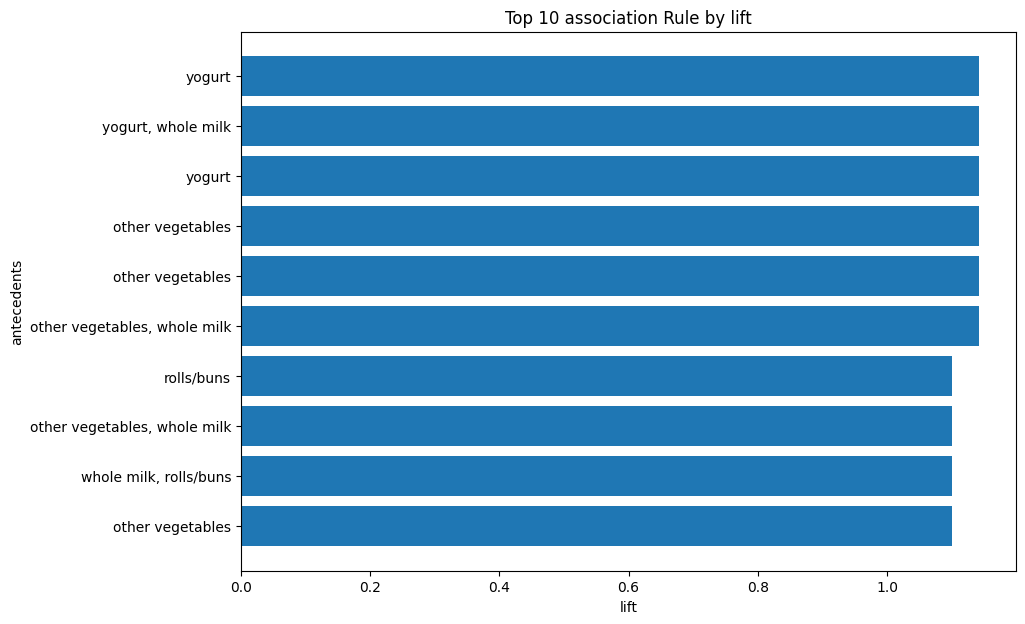

In [100]:
cat_df=basket_trans.loc[basket_trans['whole milk']==1]
frequent_itemset=apriori(cat_df,min_support=0.15,use_colnames=True)
rules=association_rules(frequent_itemset,metric="lift",min_threshold=1)
top_rules=rules.sort_values(by=['lift'],ascending=False).head(10)
top_rules['antecedents_str']=top_rules['antecedents'].apply(lambda x: ', '.join(list(x)))
top_rules['consequents_str']=top_rules['consequents'].apply(lambda x: ', '.join(list(x)))

plt.figure(figsize=(10,7))
plt.barh(range(len(top_rules)),top_rules['lift'],tick_label=top_rules['antecedents_str'])
plt.xlabel('lift')
plt.ylabel('antecedents')
plt.title('Top 10 association Rule by lift')
plt.gca().invert_yaxis()
plt.show()

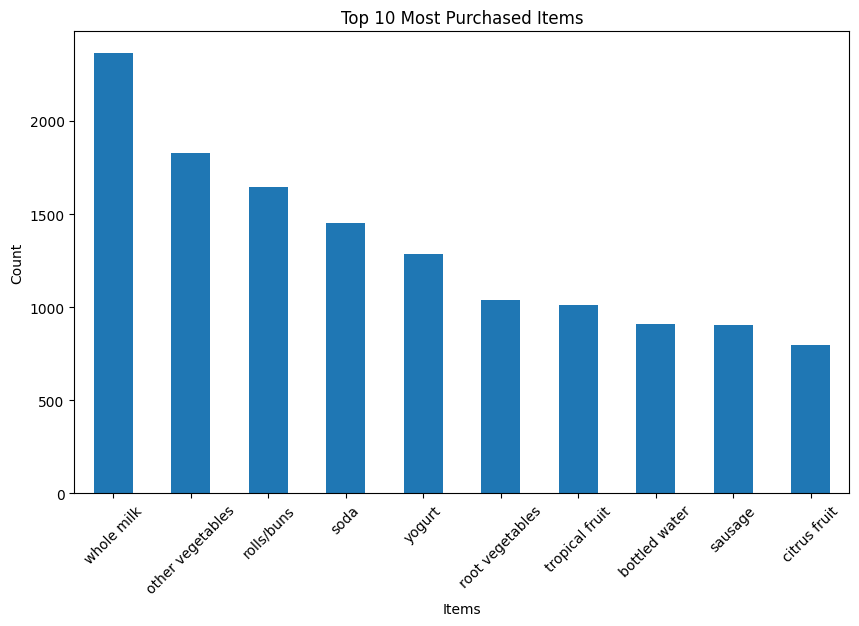

In [101]:
# Top 10 most purchased items
top_items = df1['itemDescription'].value_counts().head(10)

plt.figure(figsize=(10,6))
top_items.plot(kind='bar')
plt.title('Top 10 Most Purchased Items')
plt.xlabel('Items')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

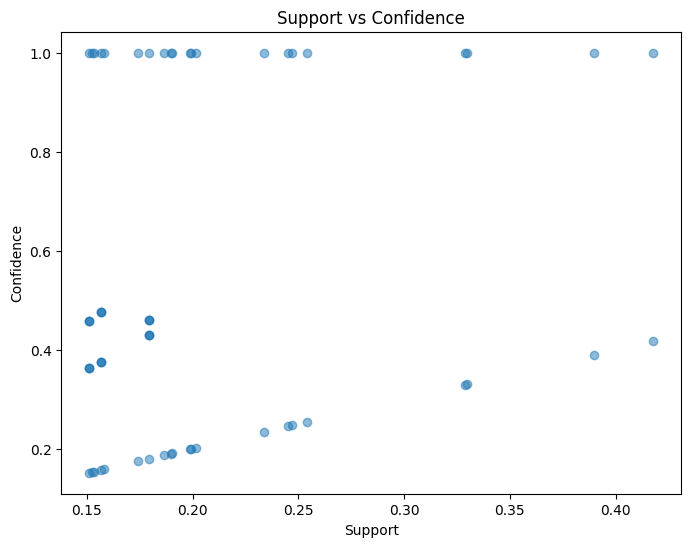

In [102]:
plt.figure(figsize=(8,6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')
plt.show()

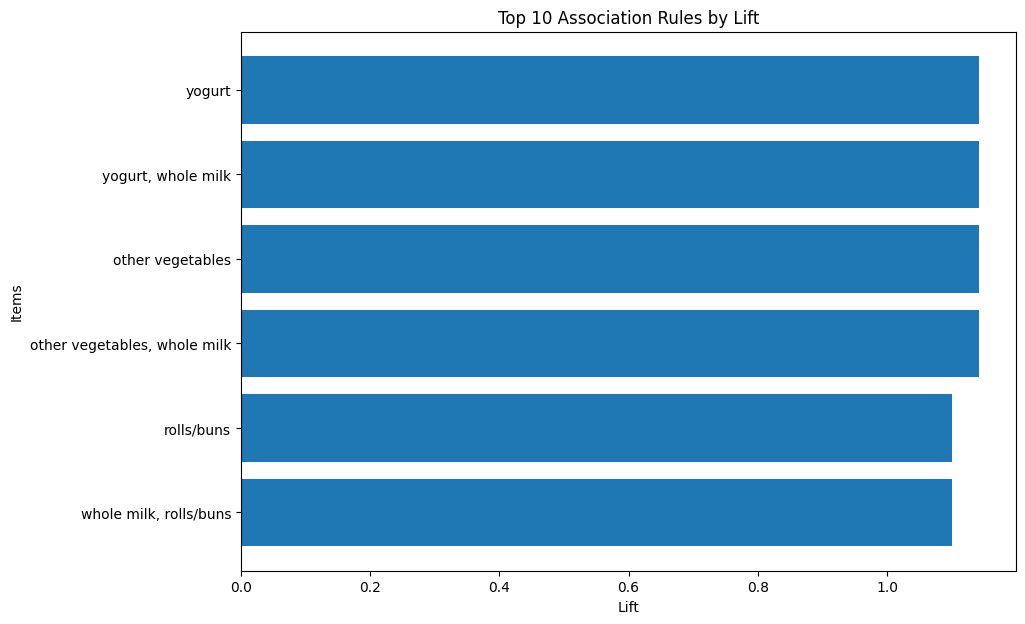

In [103]:
# Top 10 association rules by lift
top_rules = rules.sort_values(by='lift', ascending=False).head(10)

top_rules['antecedents_str']=top_rules['antecedents'].apply(lambda x: ', '.join(list(x)))
top_rules['consequents_str']=top_rules['consequents'].apply(lambda x: ', '.join(list(x)))

plt.figure(figsize=(10,7))
plt.barh(top_rules['antecedents_str'], top_rules['lift'])
plt.xlabel('Lift')
plt.ylabel('Items')
plt.title('Top 10 Association Rules by Lift')
plt.gca().invert_yaxis()
plt.show()

In [104]:
plot_rules = rules.sort_values(by='lift', ascending=False).head(10)
plot_rules['antecedents_str']=plot_rules['antecedents'].apply(lambda x: ', '.join(list(x)))
plot_rules[['antecedents_str','lift']].to_csv('top_rules.csv', index=False)

In [105]:
top_items_df = df1['itemDescription'].value_counts().head(10).reset_index()
top_items_df.columns = ['Item','Count']
top_items_df.to_csv('top_items.csv', index=False)

In [106]:
from google.colab import files

files.download('top_rules.csv')
files.download('top_items.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>